In [ ]:
Data Exploration of the collected data from telegram

In [ ]:
Library and data imports

In [89]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

with open("../Data_Telegram/messages.json", "r", encoding="utf-8") as f:
    data = json.load(f)
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'], errors="coerce")
df = df.loc[df['date'].dt.year >= 2010].copy()

In [ ]:
Basic statistics

Index(['source', 'msg_id', 'date', 'text', 'forwarded_from', 'comments'], dtype='object')
Total records (2010+): 83271
source
healthpills               24023
HealthyWorlds             14231
childrenshd                7875
healingcove                6206
naturalhealth365           5357
LiveHealthy                4581
DoctorMercola              3523
Family_Doctor_US           2625
Health_Time_US             2371
BarbaraOneill_official     2154
Name: count, dtype: int64


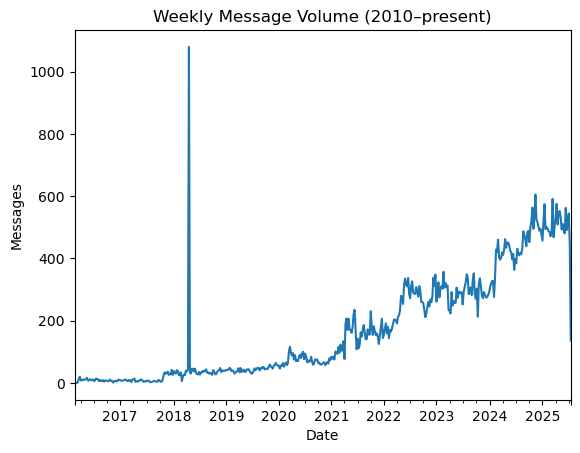

In [91]:
print(df.columns)
print("Total records (2010+):", len(df))
print(df['source'].value_counts().head(10))

df.set_index('date', inplace=True)
df.resample('W').size().plot(title="Weekly Message Volume (2010–present)")
plt.xlabel("Date"); plt.ylabel("Messages")
plt.show()

In [ ]:
Yearly distribution of messages

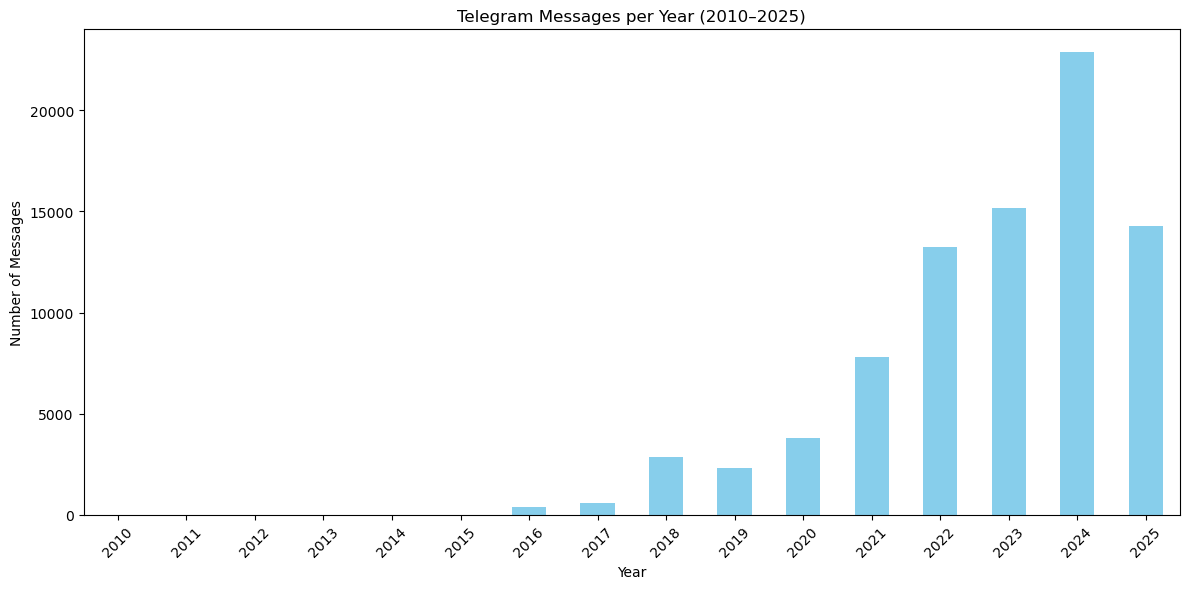

In [83]:
counts = df.groupby(df.index.year).size()
years = list(range(2010, datetime.now().year + 1))
counts = counts.reindex(years, fill_value=0)

counts.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title(f"Telegram Messages per Year (2010–{datetime.now().year})")
plt.xlabel("Year"); plt.ylabel("Number of Messages")
plt.xticks(rotation=45); plt.tight_layout()
plt.show()

In [ ]:
Topic Analysis

In [105]:
!pip install bertopic

  Using cached bertopic-0.17.3-py3-none-any.whl.metadata (24 kB)
  Using cached umap_learn-0.5.9.post2-py3-none-any.whl.metadata (25 kB)
  Using cached sentence_transformers-5.0.0-py3-none-any.whl.metadata (16 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Using cached hf_xet-1.1.5-cp37-abi3-macosx_11_0_arm64.whl.metadata (879 bytes)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached tokenizers-0.21.2-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.8 kB)
  Using cached safetensors-0.5.3-cp38-abi3-macosx_11_0_arm64.whl.metadata (3.8 kB)
Using cached bertopic-0.17.3-py3-none-any.whl (153 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.4 MB/s eta 0:00:00
Using cached sentence_transformers-5.0.0-py3-none-any.whl (470 kB)
Using cached umap_learn-0.5.9.post2-py3-none-any.whl (90 kB)
Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 11.2 MB/s eta 0:00:0000:0100:01
  


=== Analyzing @BarbaraONeillHealth (n=1578) ===
Top topics: ['-1_garlic_antioxidants_ingredients_recipe', '0_herbs_health_health secrets_companion planting', '1_healing web_health healing_pharma heal_holistic healing', '2_herbs_reduce kidney_natural diuretic_elderberry', '3_shilajit benefits_benefits shilajit_shilajit energy_pure shilajit']


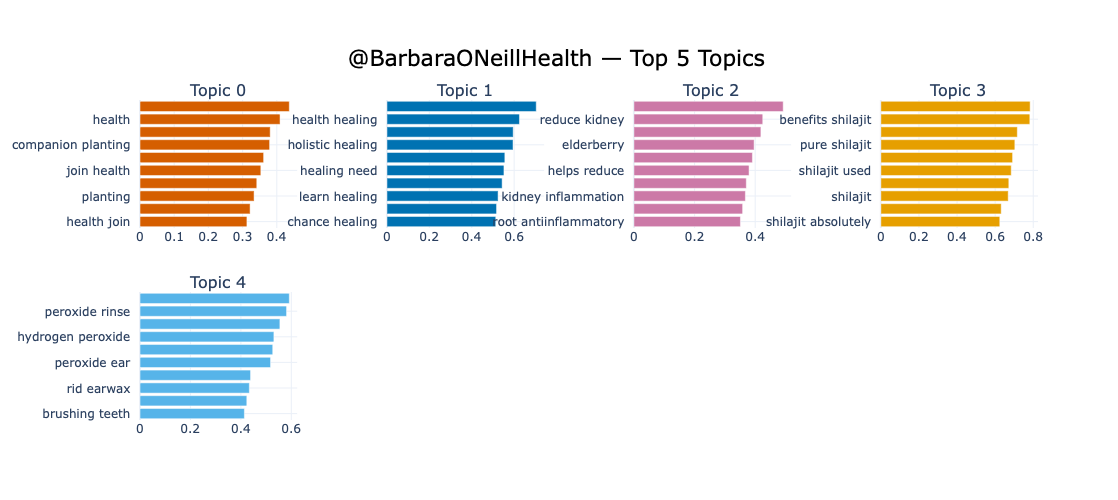


=== Analyzing @BarbaraONeilll (n=1022) ===
Top topics: ['-1_garlic_natural remedy_remedy_sugar', '0_olive oil_oils_medicinal_castor oil', '1_covid vaccine_vaccine_vaccines_vaccinated', '2_trump bitcoin_doge coin_doge coins_dogecoin', '3_verification locked_verify account_account safe_removing bot']


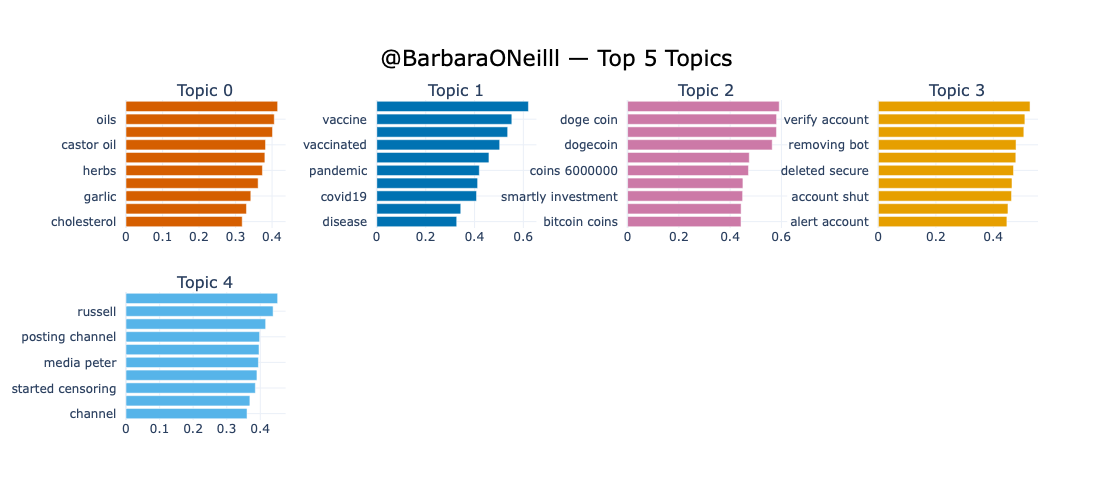


=== Analyzing @BarbaraOneill_official (n=2154) ===
Top topics: ['-1_ingredients_remedy_garlic_inflammation', '0_gmo_empower_emotions emotions_emotions', '1_herbs_herbal_medicinal plants_remedies', '2_seeds nutrients_nutrients_fruits_antioxidants', '3_drink thyroid_heal thyroid_thyroid regulate_hormonal balance']


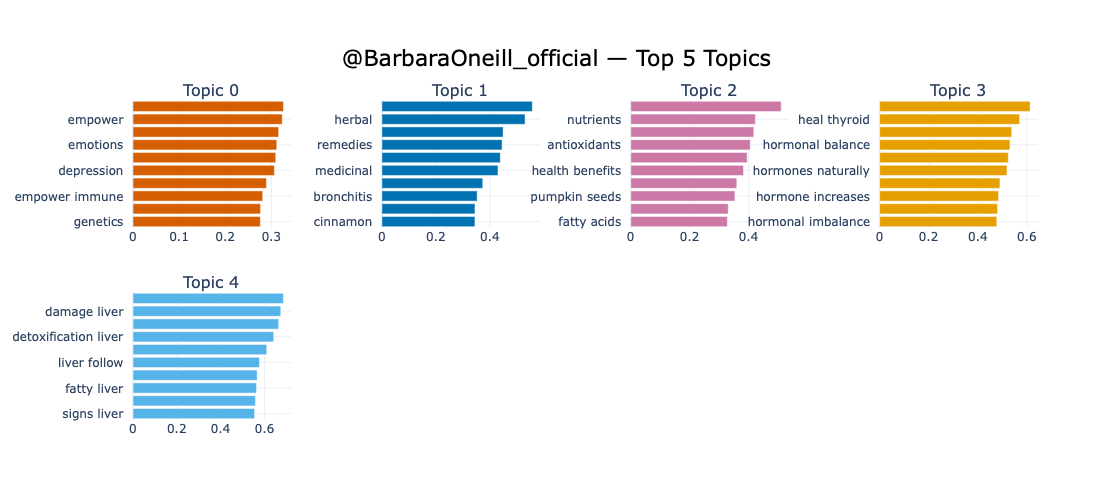


=== Analyzing @Biohacking_eng (n=343) ===
Top topics: ['-1_diet_eating_foods_sleep', '0_diet_nutritional_metabolism_nutritional value', '1_immune cells_immune_immune response_blood cells', '2_sleep deprivation_lack sleep_sleep obstructive_sleep', '3_cold help_cold water_cold cold_body temperature']


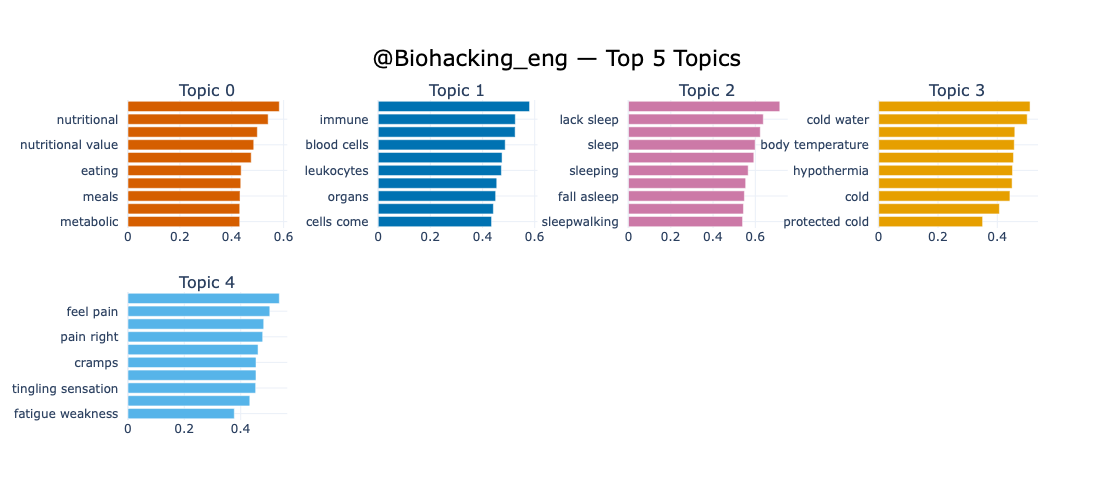


=== Analyzing @Body_Harmony_tg (n=266) ===
Top topics: ['-1_psoas muscles_tension psoas_psoas muscleis_experiences psoas', '0_lemon_cinnamon_lemons_garlic', '1_backward walking_exercises_exercise_rebounding', '2_ionic care_ionic_care device_just wellness', '3_improve shoulder_shoulder alignment_shoulders relieve_shoulder musclesessential']


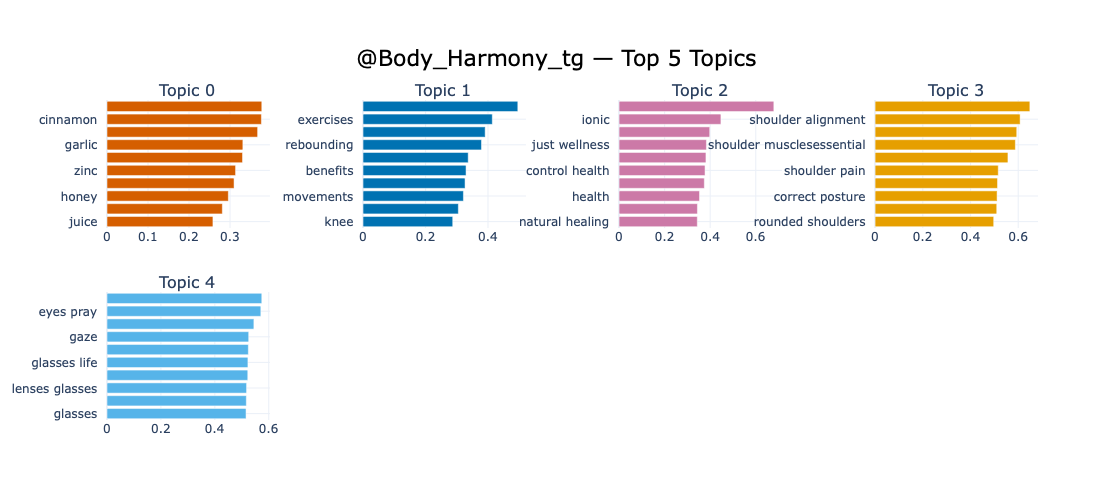


=== Analyzing @DailyBiohacking (n=174) ===
Top topics: ['-1_antioxidant_longevity tips_oxidative_biohacking longevity', '0_supplements_longevity tips_antioxidants_biohacking longevity', '1_circadian_circadian rhythm_deep sleep_melatonin', '2_tips biohacking_biohacking longevity_biohacking_new biohacks']


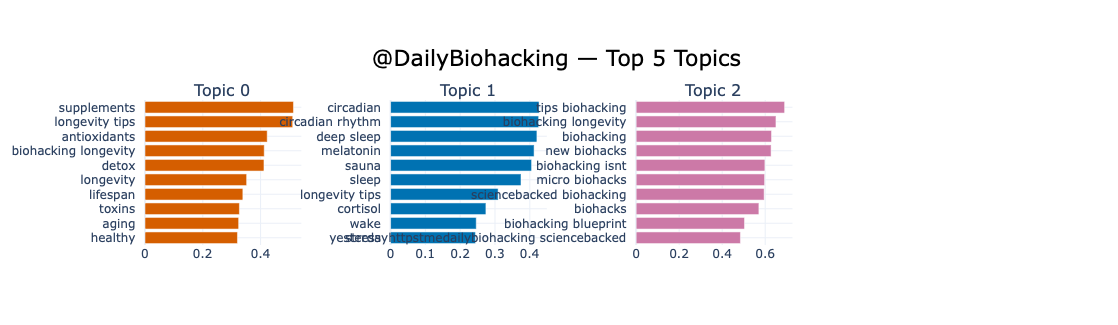


=== Analyzing @DoctorMercola (n=3523) ===
Top topics: ['-1_covid_bird flu_covid19_pandemic', '0_cellular health_health_healthy_chronic', '1_toxic chemicals_microplastics_plastics_forever chemicals', '2_improves sleep_improve sleep_sleep disorders_sleep quality', '3_mercolacoms 25th_mercolacom celebrates_mercola health_weekly mercola']


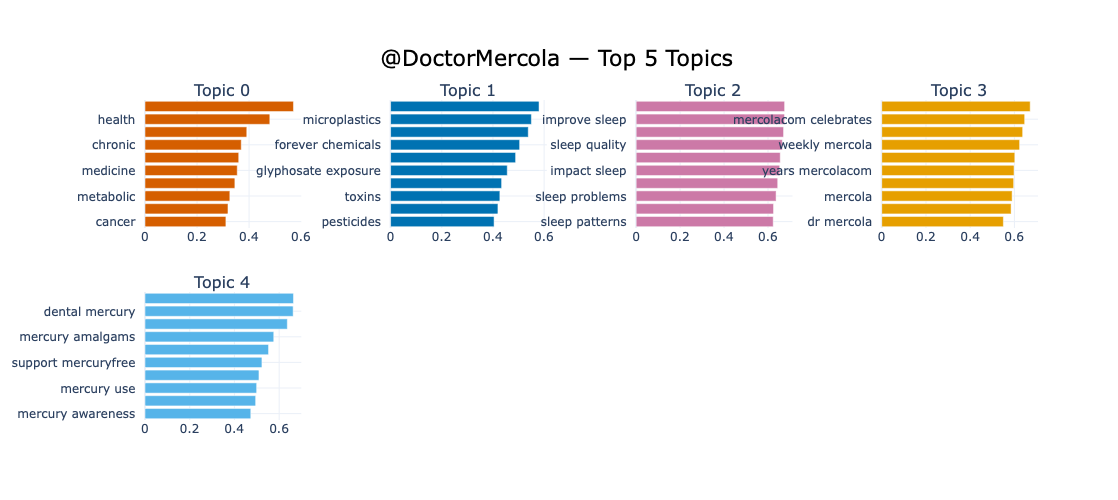


=== Analyzing @DoctorQJr (n=268) ===
Top topics: ['0_moringa_cure_health benefits_cancer', '1_join doctorqjr_doctorqjr join_doctorqjr_doctorqjr did']


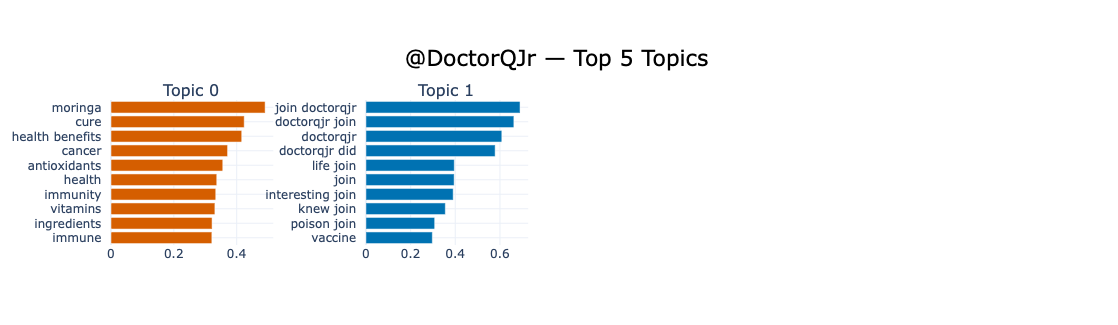


=== Analyzing @Doctor_Sebi (n=494) ===
Top topics: ['0_sea moss_nutrients_remedies_moss', '1_restoring teeth_dental solution_promoting oral_dental health']


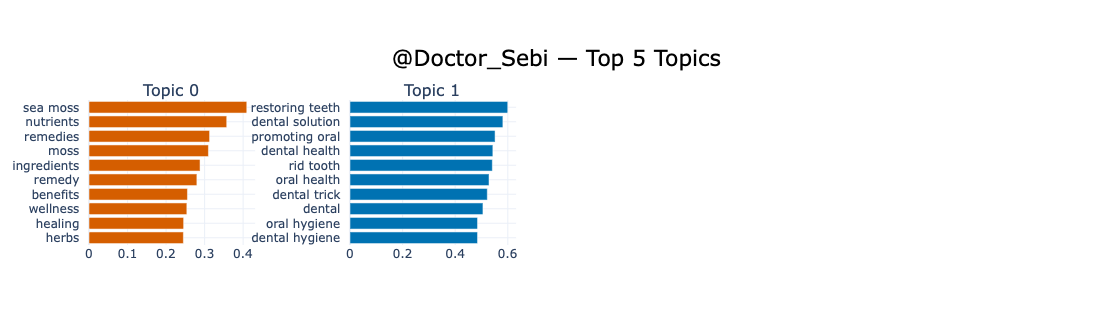


=== Analyzing @Family_Doctor_US (n=2625) ===
Top topics: ['-1_garlic_remedy_rosemary_cinnamon', '0_remedy_raisins_cleanse_garlic', '1_recommended channels_channels click_join familydoctorhttpstmebeaytciwwyixzjy6_familydoctorhttpstmebeaytciwwyixzjy6 recommended', '2_joint pain_ointment_sciatica arthritis_ointments gels', '3_shampoo conditioner_conditioner hair_shampoo_shampoo hair']


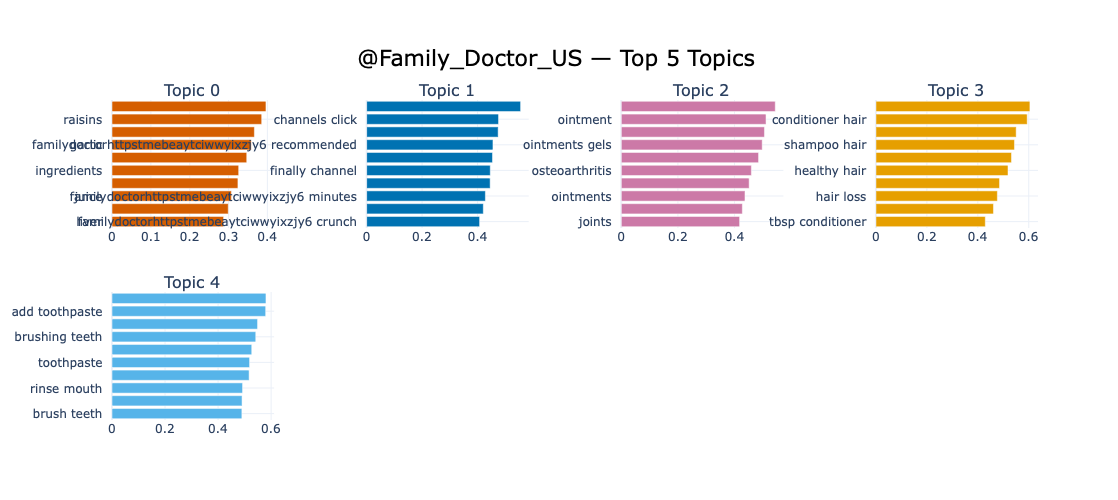


=== Analyzing @HealthHubSG (n=276) ===
Top topics: ['-1_spot stroke_stroke_signs stroke_spotstroke fast', '0_maintain healthy_healthy eating_health day_healthy', '1_immunisation week_cervical cancer_risk cancer_health screening', '2_healthhub app_explore healthhub_profiles healthhub_easierwithhealthhub', '3_sg health_sg healthhub_sg enrolment_sg healthier']


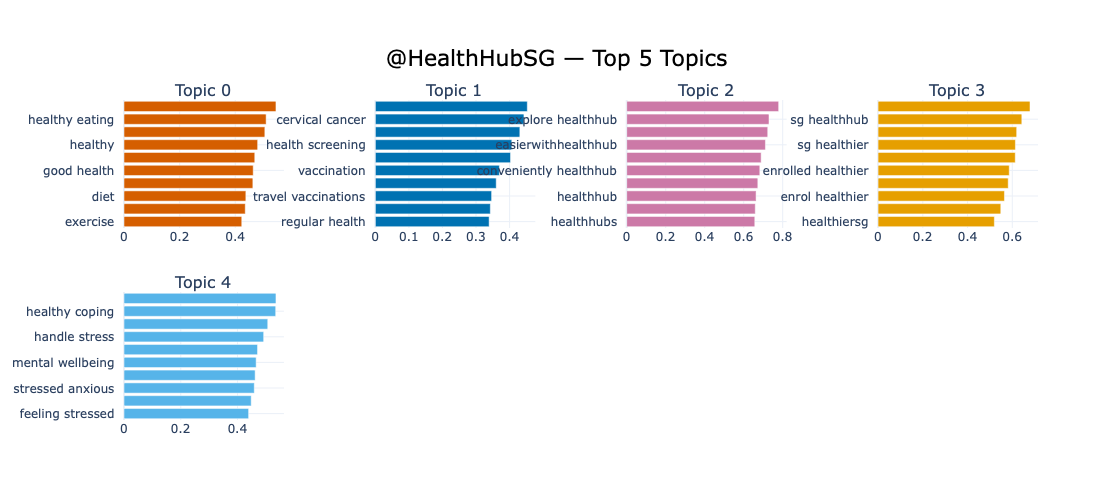


=== Analyzing @Health_Time_US (n=2371) ===
Top topics: ['-1_garlic_tea_remedy_throat', '0_honey cinnamon_turmeric_ingredients_remedy', '1_recommended channels_channels click_important channels_channels read', '2_health recipes_cancer foods_recipes_fever cure', '3_joint pain_ointment_ointments gels_sciatica arthritis']


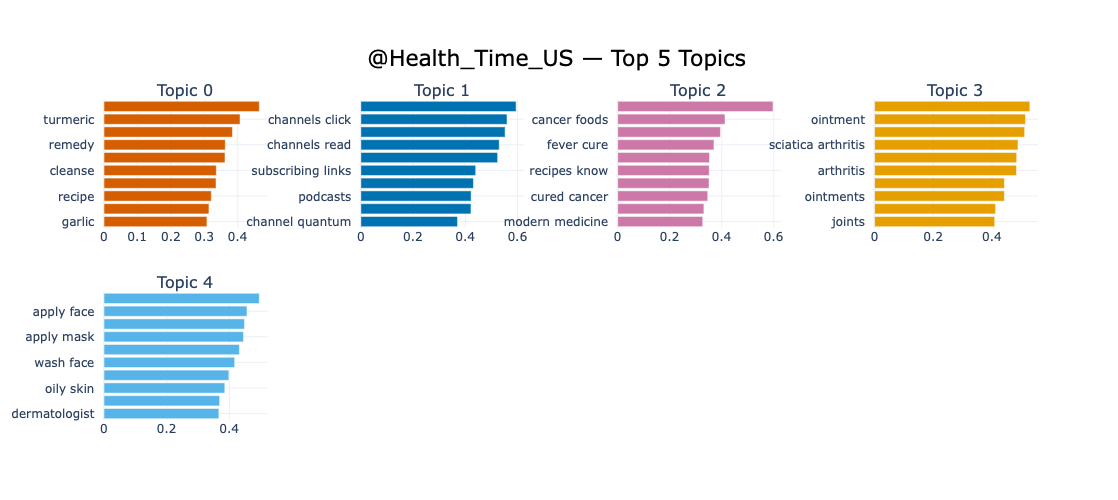


=== Analyzing @HealthyCareQ (n=603) ===
Top topics: ['0_antioxidants_remedies_turmeric_ingredients', '1_tinnitus killing_tinnitus good_fix tinnitus_tinnitus switch']


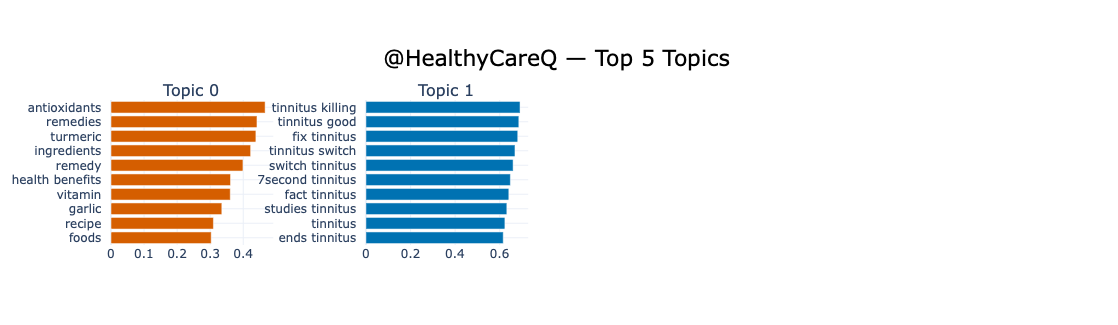


=== Analyzing @HealthyWorlds (n=14231) ===
Top topics: ['-1_sleep_sleeping_3am_detoxify body', '0_green tea_diet_tea_weight loss', '1_photo srikavi_srikavi wealth_chamrjpet photo_photo srikanth', '2_stock ideas_best stock_create wealth_spiritual', '3_gst fulfilled_n95 face_face mask_gst credit']


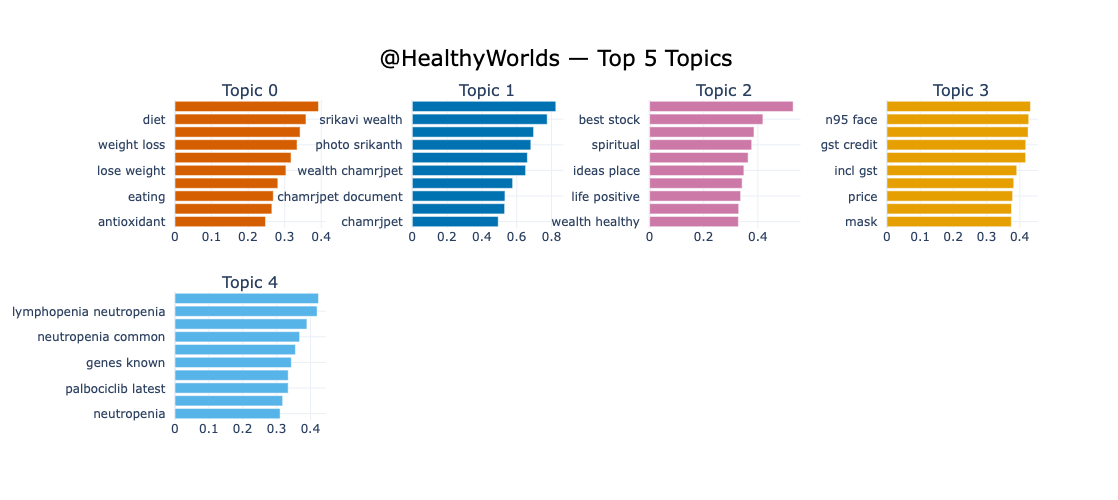


=== Analyzing @LiveHealthy (n=4581) ===
Top topics: ['-1_health_medicine_disease_livehealthy', '0_wellness summit_health summit_total wellness_food revolution', '1_vaccines revealed_covid vaccines_truth vaccines_vaccine', '2_recipe_place ingredients_garlic_coconut oil', '3_exercise_prolonged sitting_best exercises_exercises']


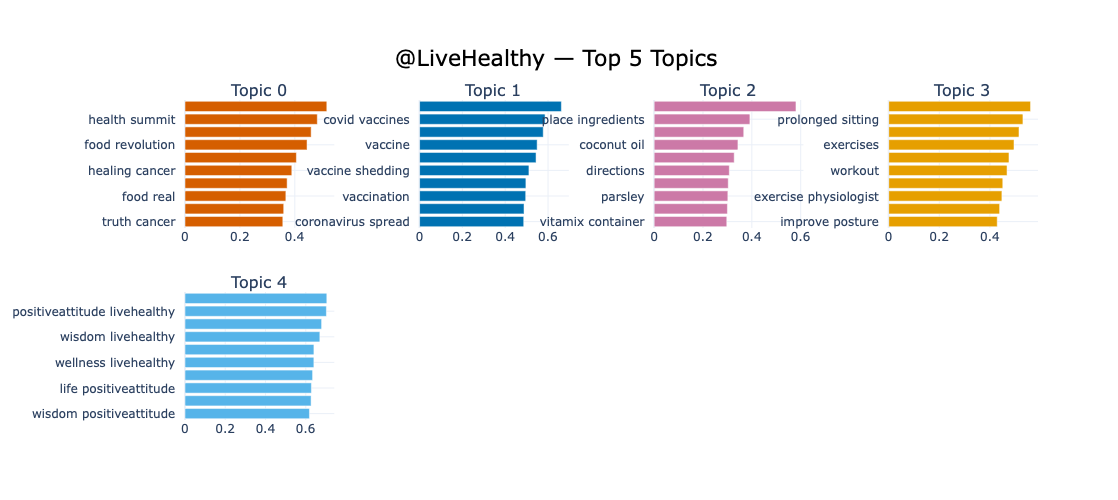


=== Analyzing @LongevityInTime (n=515) ===
Top topics: ['-1_alzheimers disease_alzheimers_amyloid_aging', '0_aging_lifespan_longevity_biological', '1_health longevity_diet_longevity_longer life', '2_morning sunlight_circadian_positiveliving sleephealth_sunlight', '3_coronavirus_covid19_ill covid19_hospitalized patients']


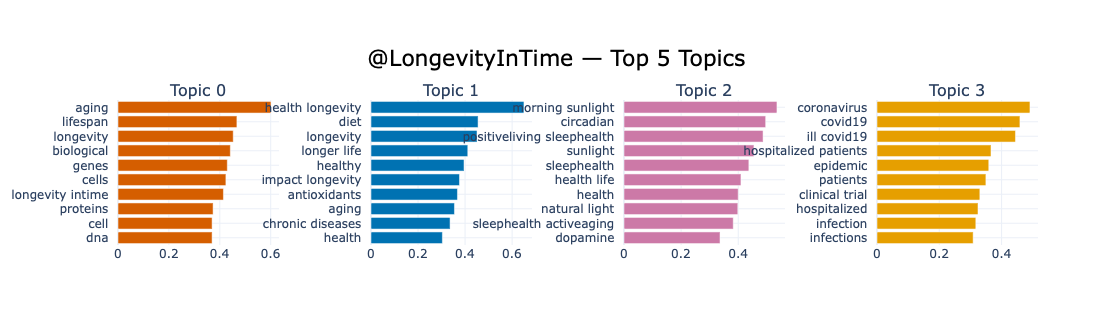


=== Analyzing @OpenLongevity_en (n=104) ===
Top topics: ['-1_longevity_immortality_digital immortality_smart tanks', '0_lifespan_lifespan extension_longevity_open longevity', '1_longevity field_longevity_lifespans_open longevity']


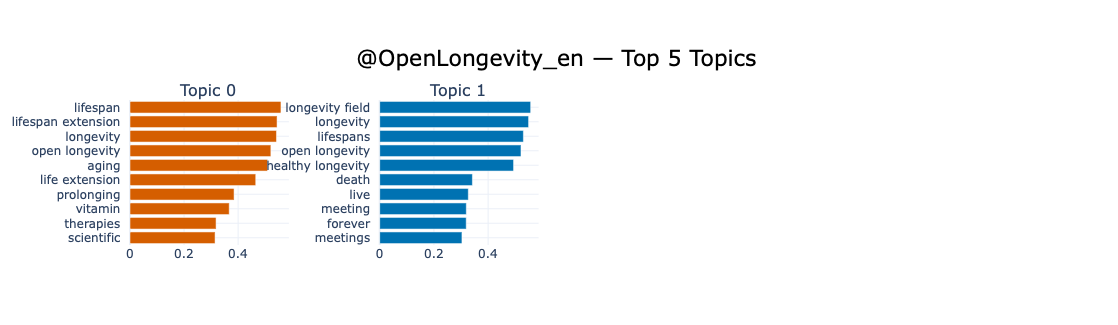


=== Analyzing @ParasitesTheGreatAwakening (n=1616) ===
Top topics: ['-1_toxins_diseases_parasites_parasite', '0_httpstmeparasitesthegreatawakeningchat detox_parasites_cleanse_cleanse body', '1_herbs_herbal_antioxidant_natural remedies', '2_vaccine_vaccines_measles vaccine_vaccine contained', '3_vitamin b17_b17 cancer_laetrile vitamin_natural vitamin']


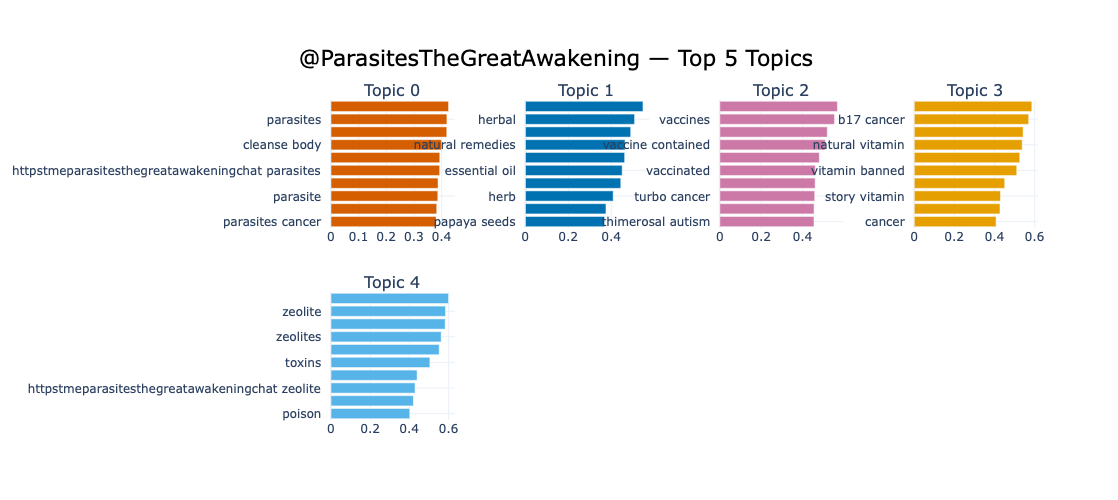


=== Analyzing @RobertKennedyJr_Official (n=750) ===
Top topics: ['-1_heal book_friends health_book barbara_health self', '0_fda_big pharma_pharmaceutical_pharma', '1_shilajit benefits_benefits shilajit_shilajit effective_shilajit shilajit', '2_beevenom cream_bee venom_beevenom_healing web', '3_benefits moringa_moringa nutrient_moringa_moringa magic']


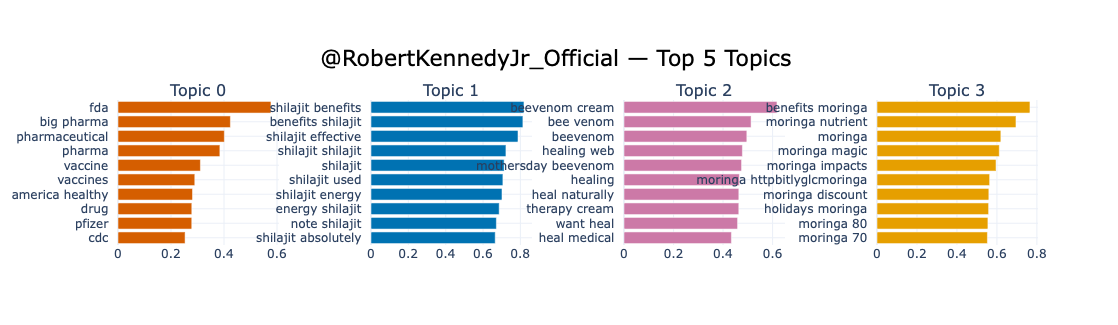


=== Analyzing @aspreyofficial (n=332) ===
Top topics: ['-1_ingredients_antioxidant_natural flavors_oils', '0_long covid_covid_vaccine_treatments', '1_vitamins_vitamin_antinutrients_inflammation', '2_instagram facebook_instagram_telegram_twitter', '3_sleep relaxation_emfs_emfs arent_relaxation']


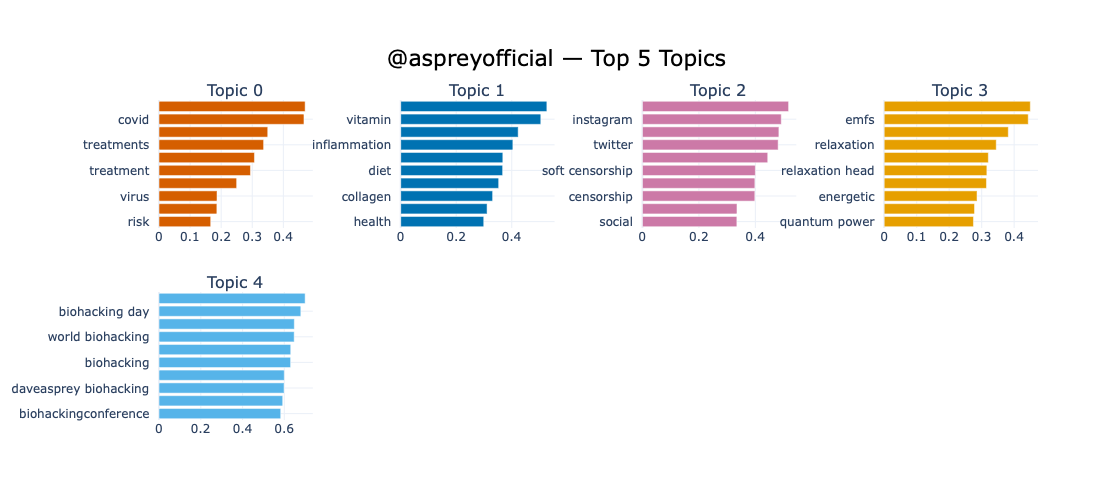


=== Analyzing @childrenshd (n=7875) ===
Top topics: ['-1_covid19 vaccines_covid vaccine_covid vaccines_vaccine', '0_vaccine_vaccines_fda_vaccinated', '1_cellphone radiation_wireless radiation_rf radiation_rf exposure', '2_childrenshealth meet_childrenshealth_follow chd_chd chapter', '3_secretary health_kennedy jr_kennedy jrs_jr secretary']


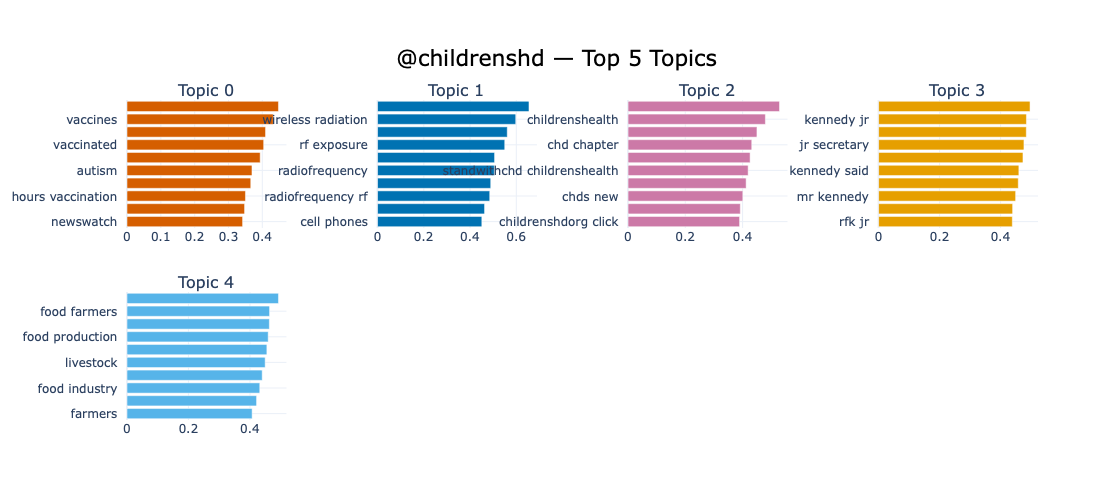


=== Analyzing @healingcove (n=6206) ===
Top topics: ['-1_health_diseases_medicine_medical', '0_covid19 vaccine_covid19 vaccines_covid vaccine_covid vaccines', '1_spirochetologist_lyme disease_disease_parasites', '2_urine therapy_molecules urine_urine urine_urine contains', '3_graphene oxide_protein graphene_graphene_oxide nanoparticles']


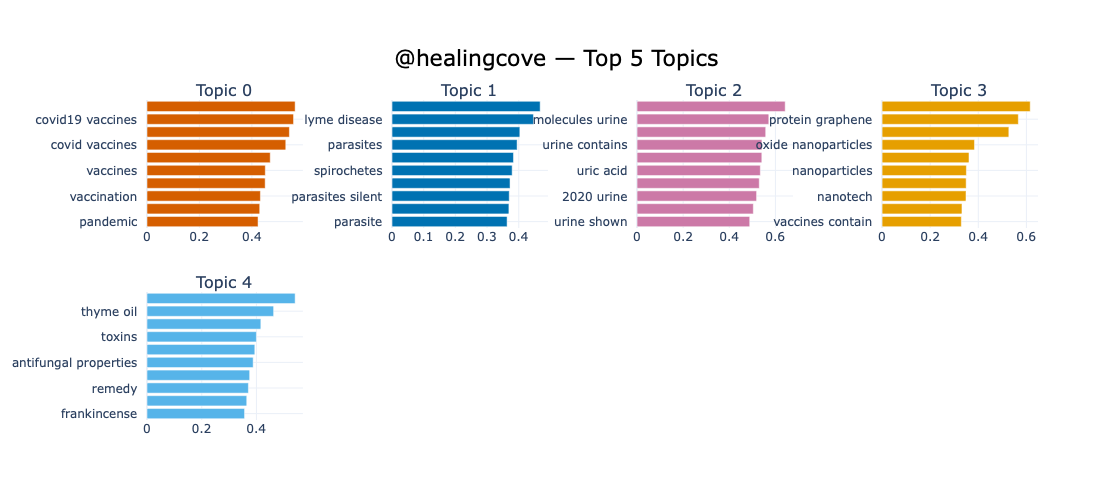


=== Analyzing @healthpills (n=24023) ===


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Top topics: ['-1_home remedy_health benefits_diet_foods', '0_cute health_adorable health_healthpills_healthpills thehealthiswealth', '1_sunday beautiful_happy sunday_monday beautiful_blessings beautiful', '2_ingredients_manuka honey_ingredients order_antibacterial', '3_magnesium vitamin_magnesium supplement_magnesium supplementation_magnesium deficiency']


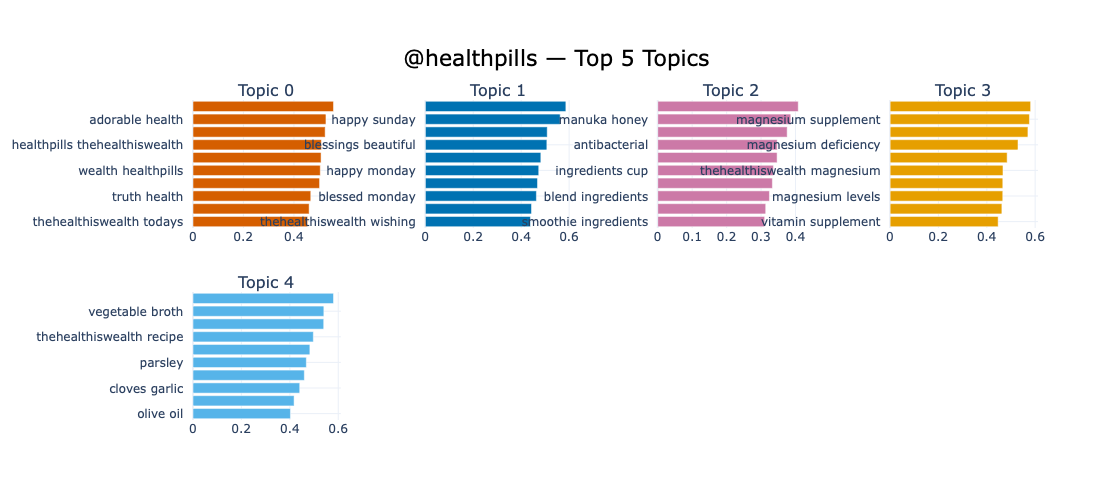


=== Analyzing @naturalhealth365 (n=5357) ===
Top topics: ['-1_covid_covid shot_covid shots_vaccine', '0_covid deaths_covid death_covid shot_deaths', '1_msnbc_tucker carlson_great interview_jeffrey epstein', '2_brilliant truth_liars look_absolutely brilliant_truth', '3_inhibit cancer_killing cancer_stopping cancer_stop cancer']


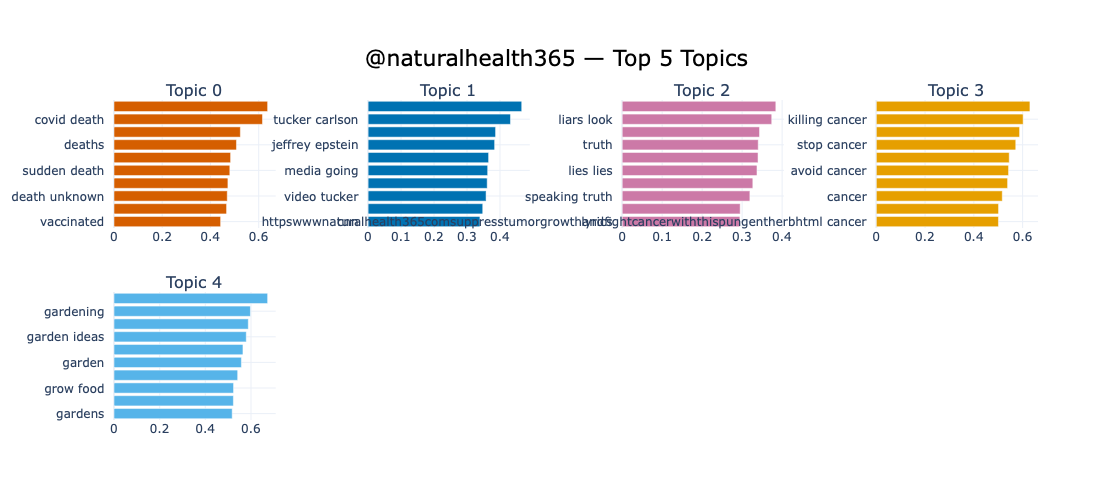


=== Analyzing @nutrition4health (n=133) ===
Top topics: ['-1_gum disease_gum_gums_teeth', '0_benefits foods_fruits_fruit_improves digestion', '1_healthy diet_diet healthy_foods weightloss_gi foods', '2_yoga_nutrition4health yoga_yoga nidra_yoga poses']


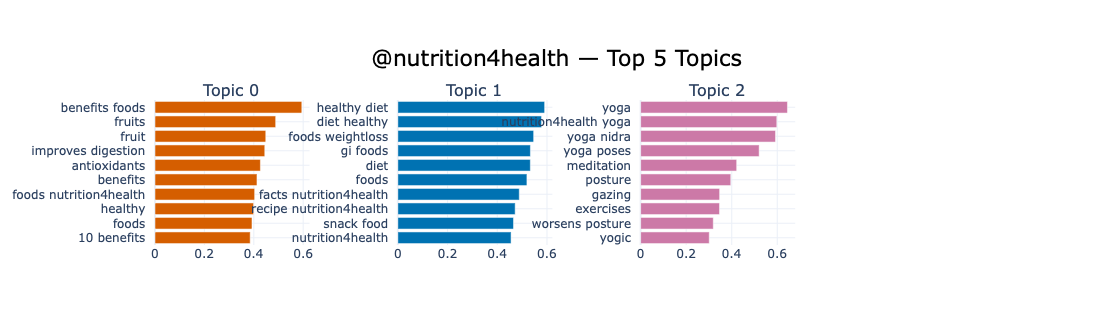

Skipping @save_it_now_1: only 99 messages

=== Analyzing @spiritual_renuval (n=1752) ===
Top topics: ['-1_spirituality_spiritual_soul_consciousness', '0_spiritualrenewalhttpstmecltsy63izhoynday mind_spiritualrenewalhttpstmecltsy63izhoynday universe_spiritualrenewalhttpstmecltsy63izhoynday brain_spiritualrenewalhttpstmecltsy63izhoynday feel', '1_healing frequencies_energy frequency_frequency_frequencies', '2_detox_toxins_cleansing liver_health', '3_history_conspiracy_mysteries_hitler']


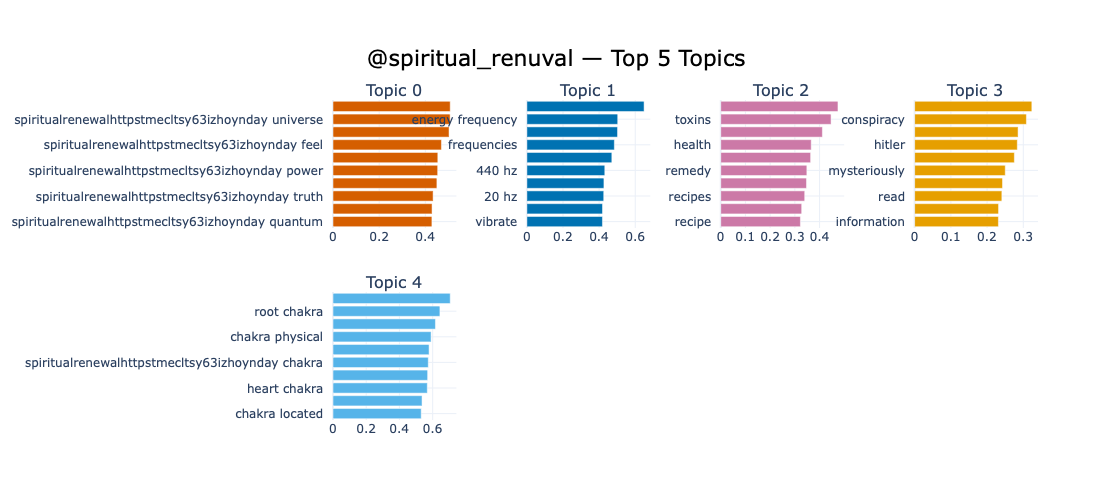


Summary:
                   channel  num_messages                                                                                                                                                                                                                                                                                                                                                                                     topics
       BarbaraONeillHealth          1578                                                                                                           [-1_garlic_antioxidants_ingredients_recipe, 0_herbs_health_health secrets_companion planting, 1_healing web_health healing_pharma heal_holistic healing, 2_herbs_reduce kidney_natural diuretic_elderberry, 3_shilajit benefits_benefits shilajit_shilajit energy_pure shilajit]
            BarbaraONeilll          1022                                                                                                              

In [133]:
import pandas as pd
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer

def safe_vectorizer(n_docs, initial_min_df=0.02, initial_max_df=0.85, step=0.05):
    """Return a working CountVectorizer, adjusting min_df/max_df until valid."""
    # Convert proportions to counts if needed
    min_df = int(initial_min_df * n_docs) if initial_min_df < 1 else initial_min_df
    max_df = int(initial_max_df * n_docs) if initial_max_df <= 1 else initial_max_df
    while min_df >= max_df:
        # Adjust max_df upward incrementally
        max_df = min(n_docs, max_df + int(step * n_docs))
        print(f"Warning: adjusted max_df to {max_df} since min_df={min_df}≥max_df")

    return CountVectorizer(
        stop_words="english",
        ngram_range=(1, 2)
    )

def extract_topics_per_channel(df, min_docs=50, top_n=5, n_words=5):
    results = []
    for chan, group in df.groupby("source"):
        texts = group["text"].dropna().astype(str).tolist()
        if len(texts) < min_docs:
            print(f"Skipping @{chan}: only {len(texts)} messages")
            continue

        print(f"\n=== Analyzing @{chan} (n={len(texts)}) ===")
        try:
            vectorizer = safe_vectorizer(len(texts))
            ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
            repr_model = KeyBERTInspired()
            
            topic_model = BERTopic(
                vectorizer_model=vectorizer,
                nr_topics="auto",
                calculate_probabilities=True,
                ctfidf_model=ctfidf_model,
                representation_model=repr_model,
            )
            topics, _ = topic_model.fit_transform(texts)
        except ValueError as e:
            # Catch cases like no terms remain or invalid parameters
            print(f"Error modeling @{chan}: {e}. Skipping channel.")
            continue

        info = topic_model.get_topic_info()
        top_topics = info.head(top_n)["Name"].tolist()
        print(f"Top topics: {top_topics}")

        fig = topic_model.visualize_barchart(
            topics=None,
            top_n_topics=top_n,
            n_words=n_words,
            title=f"@{chan} — Top {top_n} Topics"
        )
        fig.show()

        results.append({
            "channel": chan,
            "num_messages": len(texts),
            "topics": top_topics
        })

    return pd.DataFrame(results)


summary = extract_topics_per_channel(df, min_docs=100, top_n=5, n_words=10)
print("\nSummary:")
print(summary.to_string(index=False))
summary.to_csv("../Data_Telegram/channel_topics_summary.csv", index=False)

In [ ]:
TF-IDF

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def get_top_terms_per_channel(df, top_n=20):
    channel_terms = {}
    for chan, group in df.groupby("source"):
        texts = group["text"].dropna().astype(str).tolist()
        if len(texts) < 5:
            continue

        tfidf = TfidfVectorizer(
            ngram_range=(1, 2),
            max_df=0.85,
            min_df=1,
            stop_words='english'
        )
        tfidf_matrix = tfidf.fit_transform(texts)
        feature_names = tfidf.get_feature_names_out()

        # per-document average score
        mean_scores = np.asarray(tfidf_matrix.mean(axis=0)).ravel()
        top_idx = mean_scores.argsort()[-top_n:][::-1]
        top_feats = [(feature_names[i], mean_scores[i]) for i in top_idx]

        channel_terms[chan] = top_feats

        print(f"\n@{chan} — Top {top_n} terms:")
        for term, score in top_feats:
            print(f"  {term}: {score:.4f}")
    return channel_terms


In [146]:
results = get_top_terms_per_channel(df)


@BarbaraONeillHealth — Top 20 terms:
  barbara: 0.0310
  neill: 0.0310
  barbara neill: 0.0310
  secrets: 0.0308
  __ https: 0.0308
  secrets barbara: 0.0307
  https barbaraoneillhealth: 0.0307
  channel ____: 0.0307
  barbaraoneillhealth __: 0.0307
  barbaraoneillhealth: 0.0307
  neill __: 0.0307
  __health secrets: 0.0307
  __health: 0.0307
  ____ __: 0.0307
  __ telegram: 0.0307
  telegram channel: 0.0307
  telegram: 0.0306
  __ __health: 0.0302
  __join __: 0.0274
  __join: 0.0274

@BarbaraONeilll — Top 20 terms:
  barbara: 0.0390
  neill: 0.0390
  barbara neill: 0.0390
  neill https: 0.0376
  follow: 0.0349
  follow barbara: 0.0348
  https 1yd2bdvjmcxkzwfk: 0.0347
  1yd2bdvjmcxkzwfk: 0.0347
  join: 0.0257
  join barbara: 0.0252
  https e_: 0.0177
  e_ ck3b2co1kmtk8: 0.0177
  e_: 0.0177
  ck3b2co1kmtk8: 0.0177
  https officialbarbaraoneill: 0.0110
  officialbarbaraoneill: 0.0110
  health: 0.0107
  covid: 0.0101
  dr: 0.0096
  vaccine: 0.0093

@BarbaraOneill_official — Top 20 terms